# Neural Network - Practical Lesson 8

## Overview
In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see an example and two practical applications regarding regression and classification issues.

## Neural networks

### Definition
Artificial Neural Networks (ANN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. The basic process units of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron consists of weights ($w_i$) and real ($x_i$) numbers. All inputs injected into neurons are individually weighted, added together and passed into the activation function. There are many different types of activation function but one of the simplest would be step function (another is the sigmoid). 

![Step function.](step_function.png)
![Sigmoid function.](sigmoid.png)

The activation function is then responsible to provide the neuron output.

### Training of a neuron

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.
This is exactly the idea behind the neurons.
Similarly, inputs from a *training* set are presented to the neuron one after the other and weights are modified according to the expected output.

When an entire pass through all of the input training vectors is completed the neuron has learnt ! At this time, if an input vector $\vec{P}$ (already in the training set) is given to the neuron, it will output the correct value. If $\vec{P}$ is not in the training set, the network will respond with an output similar to other training vectors close to $\vec{P}$.

Unfortunately using just a neuron is not too useful since it is not possible to solve
the interesting problems we would like to face with just that simple architecture. The next step is then to put together more neurons in *layers*.

### Multi-layered neural networks

![A multi-layered neural network.](multilayer.jpeg)

Each input from the *input layer* is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.
But to train this network we need a learning algorithm which should be able to tune not only the weights between the output layer and the hidden layer but also the weights between the hidden layer and the input layer. 

### Back propagation

First of all, we need to understand what do we lack. To tune the weights between the hidden layer and the input layer, we need to know the error at the hidden layer, but we know the error only at the output layer (we know the correct output from the training sample and we also know the output predicted by the network.)
So, the method that was suggested was to take the errors at the output layer and proportionally propagate them backwards to the hidden layer.

So, what we are doing is:

* we present a training sample to the neural network (initialized with random weights);
* compute the output received by calculating activations of each layer and thus calculate the error;
* having calculated the error, we readjust the weights such that the error decreases;
* we continue the process for all training samples several times until the weights are not changing too much.

### Neural Network Design

There is no rule to guide us into the design of a neural network in terms of number of layers and neuron per layer. The most common strategy is a trail and error one where you finally pick up the solution giving the best accuracy.

A common mistake to avoid is to start with a too complex (with many layers and neurons) network which usually leads to *overtraining*. Overtraining is what happens when the NN learns too well the training sample but its performance degrade substantially in an independent testing sample.

A NN with just one hidden layer with a number of neurons averaging the inputs and outputs is sufficient in most cases. In the following we will use more complex networks just for illustration, no attempt in optimizing the layout has been done.


## Neural net to recognize handwritten digits

We don't usually appreciate how tough a problem our visual system solve (consider that it involves 5 visual cortices containing 140 million neurons each), but the difficulties of visual pattern recognition become apparent if you attempt to write a computer program to recognize digits like those below. 

![The so-called MNIST training sample](mnist_100_digits.png)

Simple intuition about how we recognize shapes - "a 9 has a loop at the top, and a vertical stroke in the bottom right" - turn out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases so that it seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those training examples. By increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So while I've shown just 100 training digits above, we could certainly build a better handwriting recognizer by using thousands or even millions or billions of training examples (**remember that neural nets are not so capable of extrapolating results, hence it won't recongnize a digit written in some strange way not included in the training sample !!!**).

Let's try to implement an ANN that is capable of recognizing handwritten digits.
To start we need to install three new modules, the easiest way of doing that is to run Anaconda on you computers (repl.it is too slow in this case):

* open an anaconda-shell and type the following:
```pip install keras, mnist, tensorflow```

```pip``` is a very useful tool that allows to install new modules to your python libraries.
Alternatively using the Anaconda GUI you should be able to install the packages using the *Environment* tab.

Our program will be based on a Convolutional Neural Network (CNN, will see later other two types of NN) which is designed for image/pattern recognition. It works essentially by applying on top of an image a series of filters (matrices) that works as edge detectors and with them it classifies the images according to their features.

![](edges.jpg)

In [5]:
import numpy as np
# contains our dataset for training
import mnist 
# keras gives us all the tools to work with NN
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

# load the training
train_images = mnist.train_images() # the actual images
train_labels = mnist.train_labels() # the truth (it is a 0, 1, 2...)

# transform data for convenience
#train_images = (train_images / 255) - 0.5
# for technical reasons you need to expand axis
train_images = np.expand_dims(train_images, axis=3)

# definition of the actual network
num_filters = 8
filter_size = 3
pool_size = 2

# the input size reflects the size of the image with
# the numbers 28x28 pixels
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=pool_size), # reduce the size of the representation
                                       # to reduce the size of the parameters
    Flatten(), # this step of flattening is necessary to transform a 
               # 2D matrix into a vector to connect to a classifier
    Dense(10, activation="softmax") # softmax is just another type of
                                    # activation functions like sigmoid or step func.
])
# the output is given by 10 neurons returning the 
# probability that image is in each class.

# adam is an algorithm to adjust the weights every cycle
# loss function compute the error between the prediction and the truth 
# metrics which error to use 
model.compile('adam', loss="categorical_crossentropy",
              metrics=['mean_squared_error'])

model.fit(train_images,
          to_categorical(train_labels),
          epochs=3)#,
          #validation_data=(test_images, to_categorical(test_labels)))
    
model.save('digit_training.h5')

Epoch 1/3
60000/60000 [==============================] - 9s 149us/step - loss: 1.8699 - mean_squared_error: 0.0193
Epoch 2/3
60000/60000 [==============================] - 9s 155us/step - loss: 0.3434 - mean_squared_error: 0.0092
Epoch 3/3
60000/60000 [==============================] - 9s 148us/step - loss: 0.2325 - mean_squared_error: 0.0079


Let's try to see how well our NN predicts MNIST testing digits.

In [5]:
import numpy as np
import mnist
from keras.models import load_model

model = load_model('digit_training.h5')

# testing with mnist test sample
test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images = np.expand_dims(test_images, axis=3)

predictions = model.predict(test_images[:5])
print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:5])
print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predictions])

Tesing on MNIST digits...
Predicted:  [7 2 1 0 4]
Truth: [7 2 1 0 4]
%: ['1.000', '1.000', '0.995', '1.000', '1.000']


To see how well our NN behaves with different kind of digits we will try to check how it works with your own calligraphy.

* Open `paint` and create a 280x280 white square
* Change brush type and set the maximum size
* With the mouse draw a digit
* Finally save the file (e.g. five.png)

Before passing the image to the NN it has to be resized and this is done with an ad hoc function (`transform_image`).

In [6]:
import numpy as np
from keras.models import load_model
from digit_converter import transform_image

model = load_model('digit_training.h5')

test_images = np.array(transform_image("five.png"))
test_images = np.expand_dims(test_images, axis=3)

predict = model.predict(test_images)
print ("\n")
print ("Tesing on custom digits...")
print ("Predicted: ", np.argmax(predict, axis=1))
print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predict])



Tesing on custom digits...
Predicted:  [5]
%: ['0.739']


Those the images I have checked:

<img src="four.png" width=80>
<img src="five.png" width=80>

## Black-Scholes call options

The first financial application of a NN concerns the pricing of european call options. 
In this case I have generated myself a large number of call options with a strike (100) and a maturity (1 year), simulated the underlying development and finally trained the NN using as inputs: volatility, strike, maturity and the underlying. The truth is the price of the call computed using the Black-Scholes formula.

![](underlyings.png)

The code used for the simulation is in $\href{https://repl.it/@MatteoSani/exercises8}{\textrm{bs_simulation.py}}$. I have also simulated two testing samples, one with the parameters included in the training events, and one with parameters outside.
The training and testing samples have been stored in a *csv* (comma-separated values) file,
which has a particular format very easy to read.

In the training I have used a *traditional* NN with an input layer with 4 neurons (the number of inputs), an hidden layer with 10 neurons and an output layer with 1 single neuron (since I need just a number, the price of the call).

In [7]:
# Regression Example 
from keras.models import Sequential, load_model
from keras.layers import Dense
import pandas as pd

dataset = pd.read_csv("bs_training.csv")
X_train = dataset.iloc[:, :4].values
Y_train = dataset.iloc[:, 4].values

# create model
model = Sequential()
model.add(Dense(15, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, epochs=1000, verbose=1)#, batch_size=10)
evaluator = model.evaluate(X_train, Y_train)
print('Test: {}'.format(evaluator))

model.save('bs_model.h5')

Epoch 1/1000
2919/2919 [==============================] - 0s 90us/step - loss: 12.5533 - mse: 258.4865 - mae: 12.5533
Epoch 2/1000
2919/2919 [==============================] - 0s 39us/step - loss: 7.4621 - mse: 91.6238 - mae: 7.4621
Epoch 3/1000
2919/2919 [==============================] - 0s 43us/step - loss: 7.1069 - mse: 80.2523 - mae: 7.1069
Epoch 4/1000
2919/2919 [==============================] - 0s 44us/step - loss: 6.9312 - mse: 75.3490 - mae: 6.9312
Epoch 5/1000
2919/2919 [==============================] - 0s 40us/step - loss: 6.6959 - mse: 70.6037 - mae: 6.6959
Epoch 6/1000
2919/2919 [==============================] - 0s 35us/step - loss: 6.3101 - mse: 62.6802 - mae: 6.3101
Epoch 7/1000
2919/2919 [==============================] - 0s 29us/step - loss: 5.6291 - mse: 49.2896 - mae: 5.6291
Epoch 8/1000
2919/2919 [==============================] - 0s 43us/step - loss: 4.4202 - mse: 29.9391 - mae: 4.4202
Epoch 9/1000
2919/2919 [==============================] - 0s 49us/step - loss

Epoch 142/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1462 - mse: 0.0359 - mae: 0.1462
Epoch 143/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1308 - mse: 0.0300 - mae: 0.1308
Epoch 144/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.2044 - mse: 0.0680 - mae: 0.2044
Epoch 145/1000
2919/2919 [==============================] - 0s 65us/step - loss: 0.1267 - mse: 0.0288 - mae: 0.1267
Epoch 146/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1596 - mse: 0.0428 - mae: 0.1596
Epoch 147/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1319 - mse: 0.0305 - mae: 0.1319
Epoch 148/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1329 - mse: 0.0296 - mae: 0.1329
Epoch 149/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1315 - mse: 0.0310 - mae: 0.1315
Epoch 150/1000
2919/2919 [==============================] - 0s 41us/step

2919/2919 [==============================] - 0s 35us/step - loss: 0.1385 - mse: 0.0323 - mae: 0.1385
Epoch 283/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1301 - mse: 0.0294 - mae: 0.1301
Epoch 284/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1395 - mse: 0.0318 - mae: 0.1395
Epoch 285/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1352 - mse: 0.0300 - mae: 0.1352
Epoch 286/1000
2919/2919 [==============================] - 0s 42us/step - loss: 0.1270 - mse: 0.0268 - mae: 0.1270
Epoch 287/1000
2919/2919 [==============================] - 0s 49us/step - loss: 0.1222 - mse: 0.0250 - mae: 0.1222
Epoch 288/1000
2919/2919 [==============================] - 0s 49us/step - loss: 0.1146 - mse: 0.0228 - mae: 0.1146
Epoch 289/1000
2919/2919 [==============================] - 0s 48us/step - loss: 0.1222 - mse: 0.0253 - mae: 0.1222
Epoch 290/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1485

2919/2919 [==============================] - 0s 48us/step - loss: 0.1001 - mse: 0.0165 - mae: 0.1001
Epoch 423/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1071 - mse: 0.0191 - mae: 0.1071
Epoch 424/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1102 - mse: 0.0200 - mae: 0.1102
Epoch 425/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1176 - mse: 0.0226 - mae: 0.1176
Epoch 426/1000
2919/2919 [==============================] - 0s 42us/step - loss: 0.1177 - mse: 0.0230 - mae: 0.1177
Epoch 427/1000
2919/2919 [==============================] - 0s 42us/step - loss: 0.1546 - mse: 0.0399 - mae: 0.1546
Epoch 428/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1305 - mse: 0.0276 - mae: 0.1305
Epoch 429/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1520 - mse: 0.0373 - mae: 0.1520
Epoch 430/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.0991

2919/2919 [==============================] - 0s 41us/step - loss: 0.1030 - mse: 0.0172 - mae: 0.1030
Epoch 563/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1132 - mse: 0.0213 - mae: 0.1132
Epoch 564/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1037 - mse: 0.0178 - mae: 0.1037
Epoch 565/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1209 - mse: 0.0234 - mae: 0.1209
Epoch 566/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1292 - mse: 0.0280 - mae: 0.1292
Epoch 567/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1000 - mse: 0.0173 - mae: 0.1000
Epoch 568/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.0990 - mse: 0.0162 - mae: 0.0990
Epoch 569/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1502 - mse: 0.0375 - mae: 0.1503
Epoch 570/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1155

2919/2919 [==============================] - 0s 42us/step - loss: 0.1085 - mse: 0.0195 - mae: 0.1085
Epoch 703/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1090 - mse: 0.0192 - mae: 0.1090
Epoch 704/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.0932 - mse: 0.0149 - mae: 0.0932
Epoch 705/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1379 - mse: 0.0329 - mae: 0.1379
Epoch 706/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1019 - mse: 0.0173 - mae: 0.1019
Epoch 707/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1026 - mse: 0.0180 - mae: 0.1026
Epoch 708/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1059 - mse: 0.0187 - mae: 0.1059
Epoch 709/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1109 - mse: 0.0201 - mae: 0.1109
Epoch 710/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1302

2919/2919 [==============================] - 0s 45us/step - loss: 0.0914 - mse: 0.0142 - mae: 0.0914
Epoch 843/1000
2919/2919 [==============================] - 0s 41us/step - loss: 0.1018 - mse: 0.0177 - mae: 0.1018
Epoch 844/1000
2919/2919 [==============================] - 0s 49us/step - loss: 0.0986 - mse: 0.0162 - mae: 0.0986
Epoch 845/1000
2919/2919 [==============================] - 0s 47us/step - loss: 0.0984 - mse: 0.0165 - mae: 0.0984
Epoch 846/1000
2919/2919 [==============================] - 0s 44us/step - loss: 0.0898 - mse: 0.0139 - mae: 0.0898
Epoch 847/1000
2919/2919 [==============================] - 0s 47us/step - loss: 0.0980 - mse: 0.0160 - mae: 0.0980
Epoch 848/1000
2919/2919 [==============================] - 0s 42us/step - loss: 0.0931 - mse: 0.0147 - mae: 0.0931
Epoch 849/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.0965 - mse: 0.0158 - mae: 0.0965
Epoch 850/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1125

2919/2919 [==============================] - 0s 34us/step - loss: 0.1058 - mse: 0.0187 - mae: 0.1058
Epoch 983/1000
2919/2919 [==============================] - 0s 44us/step - loss: 0.1056 - mse: 0.0185 - mae: 0.1056
Epoch 984/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1049 - mse: 0.0182 - mae: 0.1049
Epoch 985/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.0983 - mse: 0.0160 - mae: 0.0983
Epoch 986/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1069 - mse: 0.0185 - mae: 0.1069
Epoch 987/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.0932 - mse: 0.0148 - mae: 0.0932
Epoch 988/1000
2919/2919 [==============================] - 0s 30us/step - loss: 0.0862 - mse: 0.0127 - mae: 0.0862
Epoch 989/1000
2919/2919 [==============================] - 0s 30us/step - loss: 0.1084 - mse: 0.0196 - mae: 0.1084
Epoch 990/1000
2919/2919 [==============================] - 0s 29us/step - loss: 0.1233

Let's see now how the NN behaves with the two testing samples. First the one generated with parameters in the training phase space.

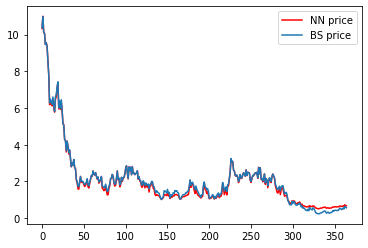

<Figure size 432x288 with 0 Axes>

In [9]:
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("bs_testing.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()
plt.savefig("comparison_fair.png")

The agreement is pretty good. To illustrate how a neural network is not able to extrapolate results if the prediction is tried with inputs outside the phase-space of the training (i.e. testing sample different from the one used in the training) I have tried to predict the price of a call with different maturity (strike and vol are in the range of the training instead):

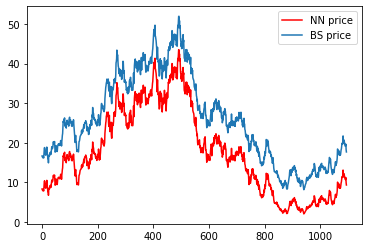

<Figure size 432x288 with 0 Axes>

In [10]:
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("bs_testing_off.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()
plt.savefig("comparison_off.png")


## Technical Analysis
In finance, technical analysis is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

As in the previous application I have generated myself the training set simulating 21600 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). *To make the training easier the features have been exagerated.*

<figure>
<img src="image_1.png" width=300>
<figcaption>No pattern</figcaption>
</figure>

<figure>
<img src="image_2.png" width=300>
<figcaption>Head and shoulder pattern</figcaption>
</figure>

<figure>
<img src="image_0.png" width=300>
<figcaption>Tringle pattern</figcaption>
</figure>

In [20]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten, GlobalAveragePooling1D
from keras.utils import to_categorical

# load the training set
with open("training_techana_labels.json", "r") as f:
    train_labels = json.load(f)
train_labels = train_labels[:3000]
train_images = []

with open("training_techana_images.json", "r") as f:
    train_images = json.load(f)
train_images = train_images[:3000]
train_images = np.array(train_images)
train_images = np.expand_dims(train_images, axis=3)

# define the CNN 
model = Sequential()
model.add(Conv1D(filters=80, kernel_size=20, 
                 activation='relu', input_shape=(101, 1)))
model.add(Conv1D(filters=80, kernel_size=15, 
                 activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(filters=100, kernel_size=10, 
                 activation='relu'))
model.add(Conv1D(filters=100, kernel_size=5, 
                 activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# make the training
model.fit(train_images, to_categorical(train_labels), 
          epochs=80, batch_size=35, verbose=2)

model.save('techana.h5')

/home/sani/.python3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Epoch 1/80
 - 2s - loss: 0.9404 - accuracy: 0.7007
Epoch 2/80
 - 2s - loss: 0.4922 - accuracy: 0.8320
Epoch 3/80
 - 2s - loss: 0.4599 - accuracy: 0.8413
Epoch 4/80
 - 2s - loss: 0.4443 - accuracy: 0.8510
Epoch 5/80
 - 2s - loss: 0.4457 - accuracy: 0.8517
Epoch 6/80
 - 2s - loss: 0.4575 - accuracy: 0.8453
Epoch 7/80
 - 2s - loss: 0.4403 - accuracy: 0.8460
Epoch 8/80
 - 2s - loss: 0.4326 - accuracy: 0.8527
Epoch 9/80
 - 2s - loss: 0.4432 - accuracy: 0.8490
Epoch 10/80
 - 2s - loss: 0.4274 - accuracy: 0.8500
Epoch 11/80
 - 2s - loss: 0.4465 - accuracy: 0.8430
Epoch 12/80
 - 2s - loss: 0.4312 - accuracy: 0.8483
Epoch 13/80
 - 2s - loss: 0.4277 - accuracy: 0.8537
Epoch 14/80
 - 2s - loss: 0.4181 - accuracy: 0.8510
Epoch 15/80
 - 2s - loss: 0.4406 - accuracy: 0.8497
Epoch 16/80
 - 2s - loss: 0.4250 - accuracy: 0.8467
Epoch 17/80
 - 2s - loss: 0.4235 - accuracy: 0.8520
Epoch 18/80
 - 2s - loss: 0.4224 - accuracy: 0.8537
Epoch 19/80
 - 1s - loss: 0.4090 - accuracy: 0.8603
Epoch 20/80
 - 1s - l

To test the perfomance I have created a longer time series and passed as input to the CNN a sliding time window to simulate the evolution of the price and a feature that is coming.
The goal is to check when the neural net is capable of predicting the incoming pattern.

<img src="closing_price.gif">

In [8]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from matplotlib import pyplot as plt

test_images = []

with open("testing_techana_frames.json", "r") as f:
    test_images = json.load(f)

test_images = np.array(test_images)
#for i in range(test_images.shape[0]):
#    plt.plot(test_images[i, :])
#    plt.show()
test_images = np.expand_dims(test_images, axis=3)

model = load_model('techana.h5')

predictions = model.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), ["{:.2f}".format(p) for p in predictions[i]])

/home/sani/.python3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


0 ['0.97', '0.00', '0.03']
0 ['0.67', '0.00', '0.33']
0 ['0.97', '0.00', '0.03']
0 ['0.93', '0.00', '0.07']
0 ['0.93', '0.00', '0.07']
0 ['0.57', '0.00', '0.43']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']


So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.

## Exercises

### Exercise 8.1
Try to repeat all the example shown during the lesson.

### Exercise 8.2
Using the same code illustrated above, test the ANN to recognize digits with your own handwriting (e.g. try to exagerate some feature to fool the NN, or even pass it letters instead of digits and interpret the results).

### Exercise 8.3
Taking as example the pricing NN trained on call, try to price put options.

